Im Beispiel der logistischen Regression habe ich Ihnen neue Irisdaten gegeben:
4.8,2.5,5.3,2.4
Bitte klassifizieren Sie diese Blume mit KNN (mit allen verfügbaren Bibliotheken, wie Sie möchten)
Hier ist ein gutes Scikit-Beispiel, das Sie verwenden können:
Referenz [1]
Als Notizbuch verpackt [2]

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
pathname = 'data/iris-data.csv'
df = pd.read_csv(pathname)

test_row = {'sepal_length':4.8,
'sepal_width':2.5,
'petal_length':5.3,
'petal_width':2.4,
'target':3}
df = df.append(test_row,ignore_index=True)

df.head(2)

/tmp/ipykernel_3810/4263832758.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(test_row,ignore_index=True)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


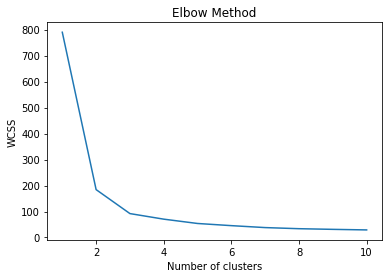

In [3]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

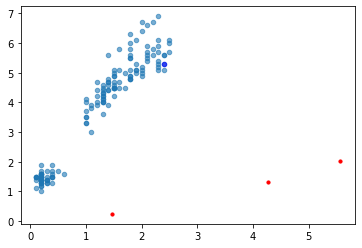

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=10, c='red')
plt.scatter(df['petal_width'], df['petal_length'], s=20, alpha=0.6)
plt.scatter(np.array([2.4]), np.array([5.3]), s=20, alpha=0.6, c='blue')
plt.show()

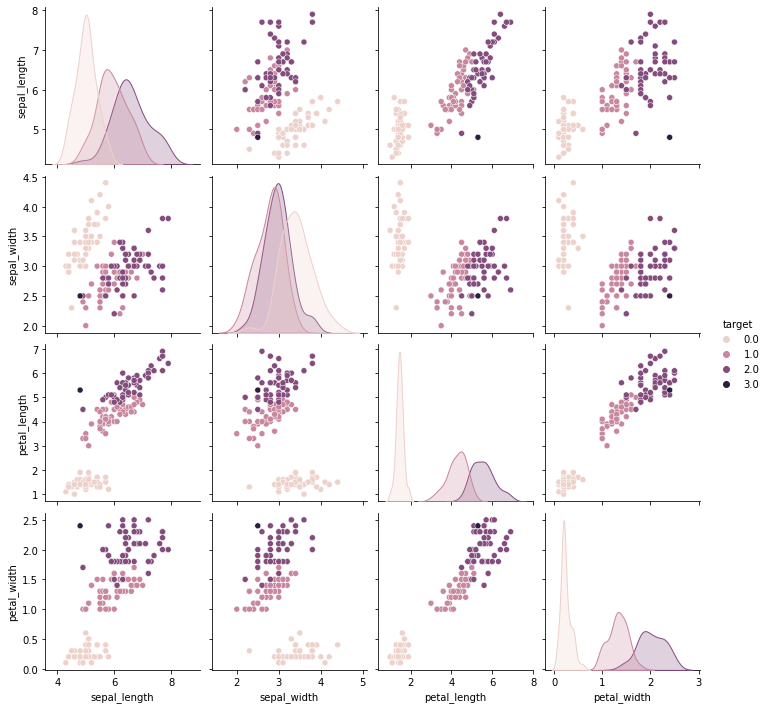

In [5]:
sns.pairplot(df, hue='target')